# Mount Drive with Colab

In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Import Libraries

In [19]:
import os

os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input


In [20]:
# Load the data
data = pd.read_csv("/content/drive/MyDrive/Colab Dataset/mobilenetv2_meta.csv")

In [21]:
data

,optimizer,learning_rate,momentum,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,adagrad,0.008751,0.104857,81.2750,75.3438,98.9703,8,348.002441,16,0.041280,1.000000
1,adam,0.001269,0.153086,77.1636,73.4545,132.8219,11,304.502136,16,0.065116,0.979167
2,adamax,0.007288,0.211320,75.5429,73.5071,88.2348,7,435.003052,15,0.110147,0.963542
3,ftrl,0.000581,0.469927,75.0548,75.0619,256.7182,21,304.502136,15,0.184383,0.953125
4,nadam,0.000211,0.187863,74.2542,73.8125,135.8448,12,43.500305,15,0.072042,0.984375
...,...,...,...,...,...,...,...,...,...,...,...
1010,ftrl,0.007620,0.787029,52.1591,40.9182,148.7001,11,43.500305,16,0.051317,0.989583
1011,nadam,0.001103,0.559923,53.1643,43.7071,113.8758,7,391.502747,15,0.157909,0.937500
1012,sgd,0.006675,0.477616,51.4250,43.9438,211.1450,16,304.502136,15,0.084905,0.979167
1013,rmsprop,0.008886,0.434062,51.9273,47.0500,139.8019,11,174.001221,15,0.116141,0.989583


In [22]:
data.shape

(1015, 11)

# Dataset Preprocessing

In [23]:
# identify the null values
data.isnull().sum()

optimizer        0
learning_rate    0
momentum         0
cpu              0
memory           0
time             0
epochs           0
predictions      0
dataset          0
loss             0
accuracy         0
dtype: int64

In [24]:
# label Encoding

from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
data['optimizer']=le.fit_transform(data['optimizer'])

In [25]:
# first five rows
data.head()

,optimizer,learning_rate,momentum,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,1,0.008751,0.104857,81.2750,75.3438,98.9703,8,348.002441,16,0.041280,1.000000
1,2,0.001269,0.153086,77.1636,73.4545,132.8219,11,304.502136,16,0.065116,0.979167
2,3,0.007288,0.211320,75.5429,73.5071,88.2348,7,435.003052,15,0.110147,0.963542
3,4,0.000581,0.469927,75.0548,75.0619,256.7182,21,304.502136,15,0.184383,0.953125
4,5,0.000211,0.187863,74.2542,73.8125,135.8448,12,43.500305,15,0.072042,0.984375


In [ ]:
# info of dataset
data.info()

In [26]:
data.columns

Index(['optimizer', 'learning_rate', 'momentum', 'cpu', 'memory', 'time',
       'epochs', 'predictions', 'dataset', 'loss', 'accuracy'],
      dtype='object')

In [27]:
input_features = data[['cpu', 'memory', 'dataset']]
output_features = data[['optimizer', 'learning_rate', 'momentum', 'time', 'epochs', 'loss', 'accuracy']]

In [28]:
x=input_features
y=output_features

# Visulization

# Box Plot

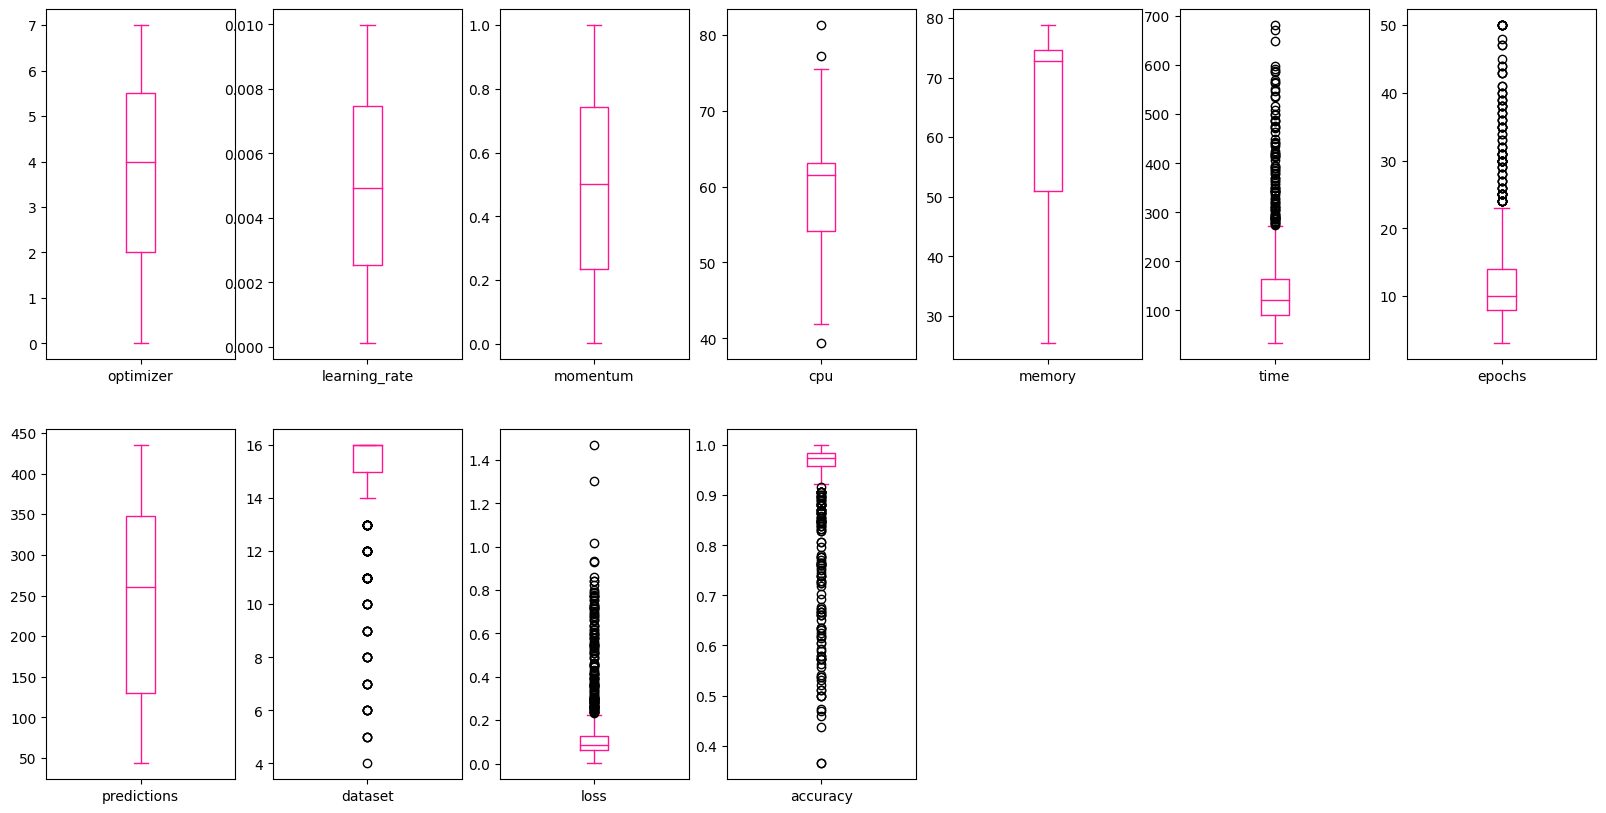

In [47]:
data.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

# Histogram 

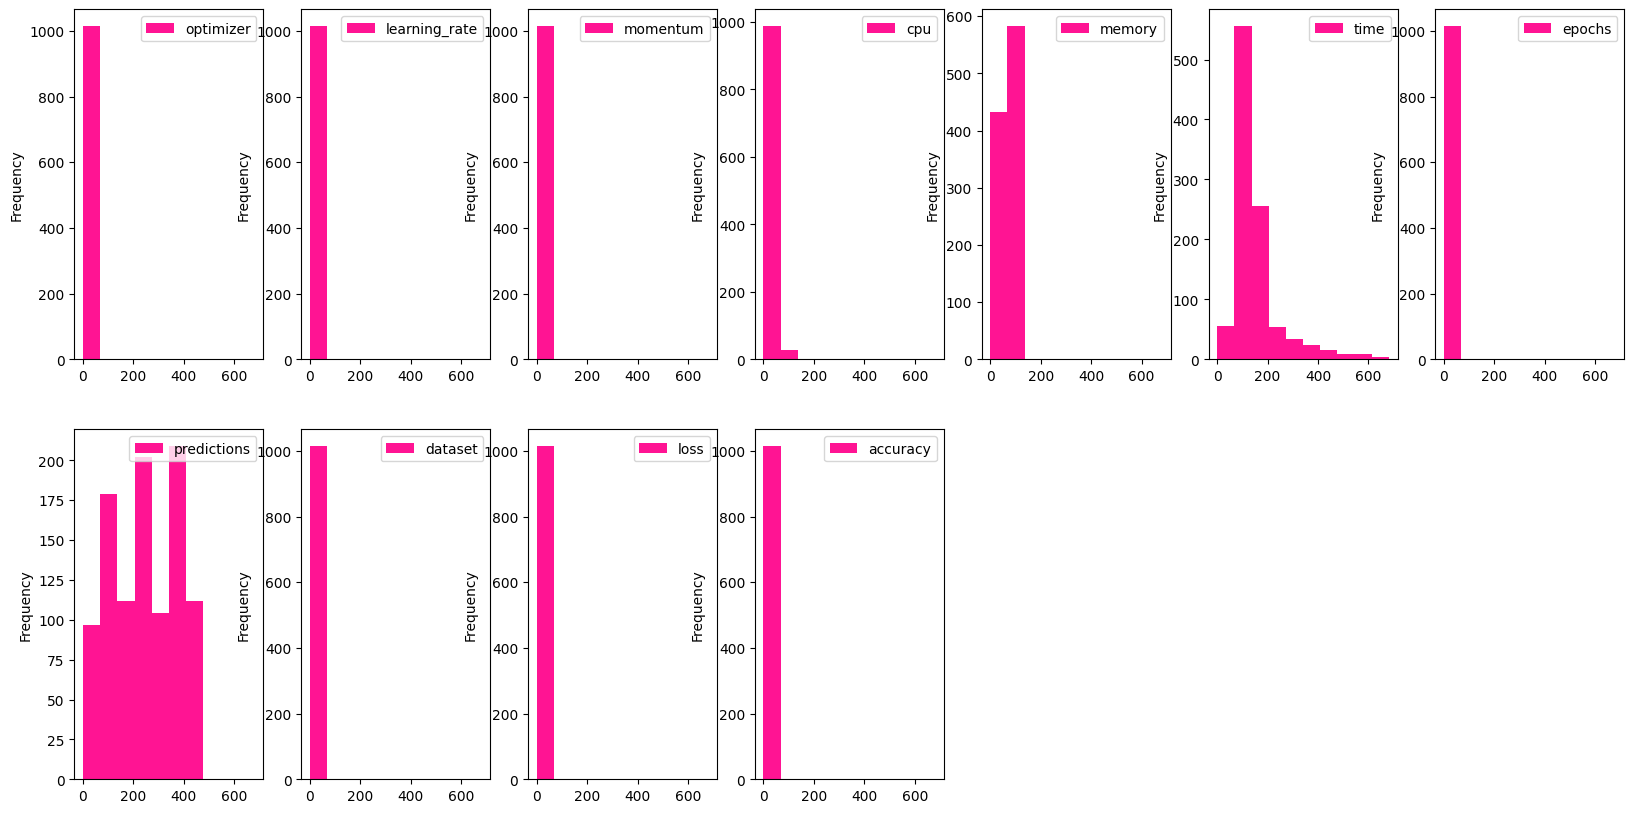

In [50]:
data.plot(kind='hist', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

# Feature Engineering

In [31]:
# feature engieering
x_train , x_test , y_train , y_test=train_test_split(x,y,test_size=0.25)

In [32]:
x_train

,cpu,memory,dataset
376,61.6700,72.3300,15
827,61.0667,52.1917,16
81,65.7000,75.9167,16
896,53.3000,62.5917,16
131,64.1192,73.3923,16
...,...,...,...
668,54.0188,43.0812,16
816,46.7500,50.5375,16
662,57.7712,50.1167,16
656,49.5222,53.5333,16


In [33]:
# covert dataframe to array
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [34]:
# Shape 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(761, 3)
(761, 7)
(254, 3)
(254, 7)


# Deep Learning Model ( Neural Network)

In [36]:
# Define the model architecture
nn_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(7, activation='softmax')
])

In [37]:
nn_model.compile(optimizer='adam' , loss=['categorical_crossentropy', 'mse'] , metrics=['accuracy', 'mse'])

In [38]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 7)                 119       
                                                                 
Total params: 11,495
Trainable params: 11,495
Non-trainable params: 0
_________________________________________________________________


In [39]:
nn_model.fit(x_train , y_train , epochs=2 , batch_size=32)

Epoch 1/2
24/24 [==============================] - 2s 2ms/step - loss: 497.6125 - accuracy: 0.6820 - mse: 4386.6069 
Epoch 2/2
24/24 [==============================] - 0s 2ms/step - loss: 2216.2354 - accuracy: 1.0000 - mse: 4373.2285
